# Section 1: inspecting indicator variables

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Basic RICE - Nordhaus Policy - 2.xlsx", sheet_name='US', index_col=0)

Determine wheter there is noise present in the indicator variables. Each variable of the RICE model is a potential indicator variable. If there is noise present then an action can be triggered in a policy tree based on noise/ an outlier which could derail the policy tree optimization.

In [5]:
# Because the indicators have values over very different scales, group them in 4 so they can be plotted clearly.
range_dict = {}
for col in df.columns:
    range_dict[col] = df[col].max() - df[col].min()
    
list_1 = []
list_2 = []
list_3 = []
list_4 = []
for key, value in range_dict.items():
    if value < 1:
        list_1.append(key)
    elif 1 <= value < 10:
        list_2.append(key)
    elif 10 <= value < 100:
        list_3.append(key)
    elif value > 100:
        list_4.append(key)
    else:
        print(value)
# Remove ml from fig because it distorts all the other figures
list_3.remove('ml')     
# list_4.append('ml')

Plot the 4 different plots to see if the data looks noisy.

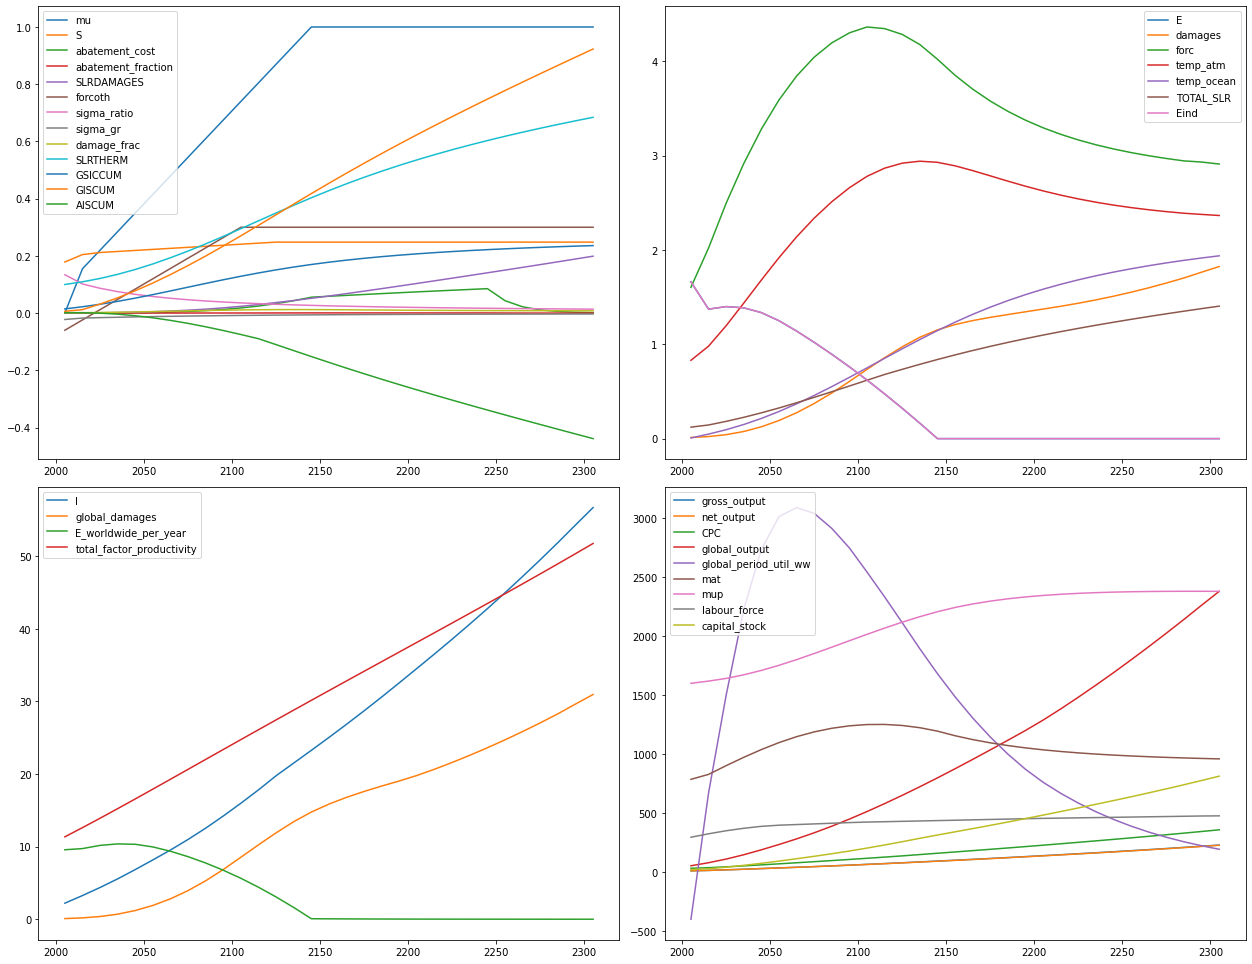

In [9]:
plt.rcParams["figure.figsize"] = [17.50, 13.50]
# plt.figure(figsize=(20,10)) 
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False)

for col in list_1:
    df[col].plot(ax=axes[0,0], legend=True)
    
for col in list_2:
    df[col].plot(ax=axes[0,1], legend=True)
    
for col in list_3:
    df[col].plot(ax=axes[1,0], legend=True)
    
for col in list_4:
    df[col].plot(ax=axes[1,1], legend=True)
    
plt.show()
# plt.savefig('Basic RICE - Nordhaus Policy - 2 - indicator_vars.png', dpi=100, facecolor='w')

Conclusion: the data is not noisy. No further inspection required.

Determine maximum and minimum values for all possible indicators so they can be used as bounds in the POT algorithm

In [10]:
df_dict = {}
for col in df.columns:
    df_dict[col] = {}
    df_dict[col]['max'] = df[col].max()
    df_dict[col]['min'] = df[col].min()
    df_dict[col]['max_50_perc'] = df[col].max()*1.5
    df_dict[col]['min_50_perc'] = df[col].min()*0.5
    
df_bounds = pd.DataFrame.from_dict(df_dict)
df_bounds.T

,max,min,max_50_perc,min_50_perc
mu,1.000000,4.328387e-04,1.500000,2.164193e-04
S,0.248000,1.785179e-01,0.372000,8.925896e-02
E,1.661414,0.000000e+00,2.492121,0.000000e+00
damages,1.824070,1.206617e-02,2.736105,6.033087e-03
abatement_cost,0.085313,1.284707e-12,0.127969,6.423533e-13
abatement_fraction,0.000584,1.036229e-13,0.000876,5.181146e-14
SLRDAMAGES,0.198857,0.000000e+00,0.298285,0.000000e+00
gross_output,230.388504,1.239790e+01,345.582756,6.198950e+00
net_output,228.562998,1.238583e+01,342.844496,6.192917e+00
I,56.683623,2.211093e+00,85.025435,1.105547e+00


# Section 2: test performance MOEAs

In [22]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

Most data is saved in sqlite databases, the functions below turn them into a pandas dataframe

In [12]:
def view_sqlite_database(database, table_name):
    conn = sqlite3.connect(database)
    
    df = pd.read_sql_query(f'''SELECT * FROM {table_name}''', conn)
    
    conn.commit()
    conn.close()
    return df

def list_table_names_in_db(database):
    try:
     
        # Making a connection between sqlite3
        # database and Python Program
        sqliteConnection = sqlite3.connect(database)

        # If sqlite3 makes a connection with python
        # program then it will print "Connected to SQLite"
        # Otherwise it will show errors
        print("Connected to SQLite")

        # Getting all tables from sqlite_master
        sql_query = """SELECT name FROM sqlite_master
        WHERE type='table';"""

        # Creating cursor object using connection object
        cursor = sqliteConnection.cursor()

        # executing our sql query
        cursor.execute(sql_query)
        print("List of tables\n")

        # printing all tables list
        print(cursor.fetchall())
 
    except sqlite3.Error as error:
        print("Failed to execute the above query", error)

    finally:

        # Inside Finally Block, If connection is
        # open, we need to close it
        if sqliteConnection:

            # using close() method, we will close
            # the connection
            sqliteConnection.close()

            # After closing connection object, we
            # will print "the sqlite connection is
            # closed"
            print("the sqlite connection is closed")

### Experiment 1: RICE optimization with original POT algorithm

Experiment 1:
groupsize = 3
max_depth = 7
max_nfe = 125000

--- input POT ---
feature_bounds=[[780, 1300], [55, 2300], [2005, 2305]],
feature_names=['mat', 'net_output', 'year'],
discrete_actions=True,
action_names=['miu_2100', 'miu_2150', 'miu_2200', 'miu_2125', 'sr_02', 'sr_03', 'sr_04', 'sr_05'],
mu=20,  # number of parents per generation, 20
cx_prob=0.70,  # crossover probability
population_size=100,  # 100
max_depth=7,
multiobj=True

In [15]:
database = 'POT_Experiments.db'
list_table_names_in_db(database)

Connected to SQLite
List of tables

[('indicator_groupsize_bin_tournament',), ('indicator_groupsize_3_bin_tournament_1',)]
the sqlite connection is closed


In [16]:
table_name = 'indicator_groupsize_3_bin_tournament_1'

In [17]:
df = view_sqlite_database(database, table_name)
df.drop('index', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126376 entries, 0 to 126375
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   policy            126376 non-null  object 
 1   utilitarian_ofv1  126376 non-null  float64
 2   utilitarian_ofv2  126376 non-null  float64
 3   utilitarian_ofv3  126376 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.9+ MB


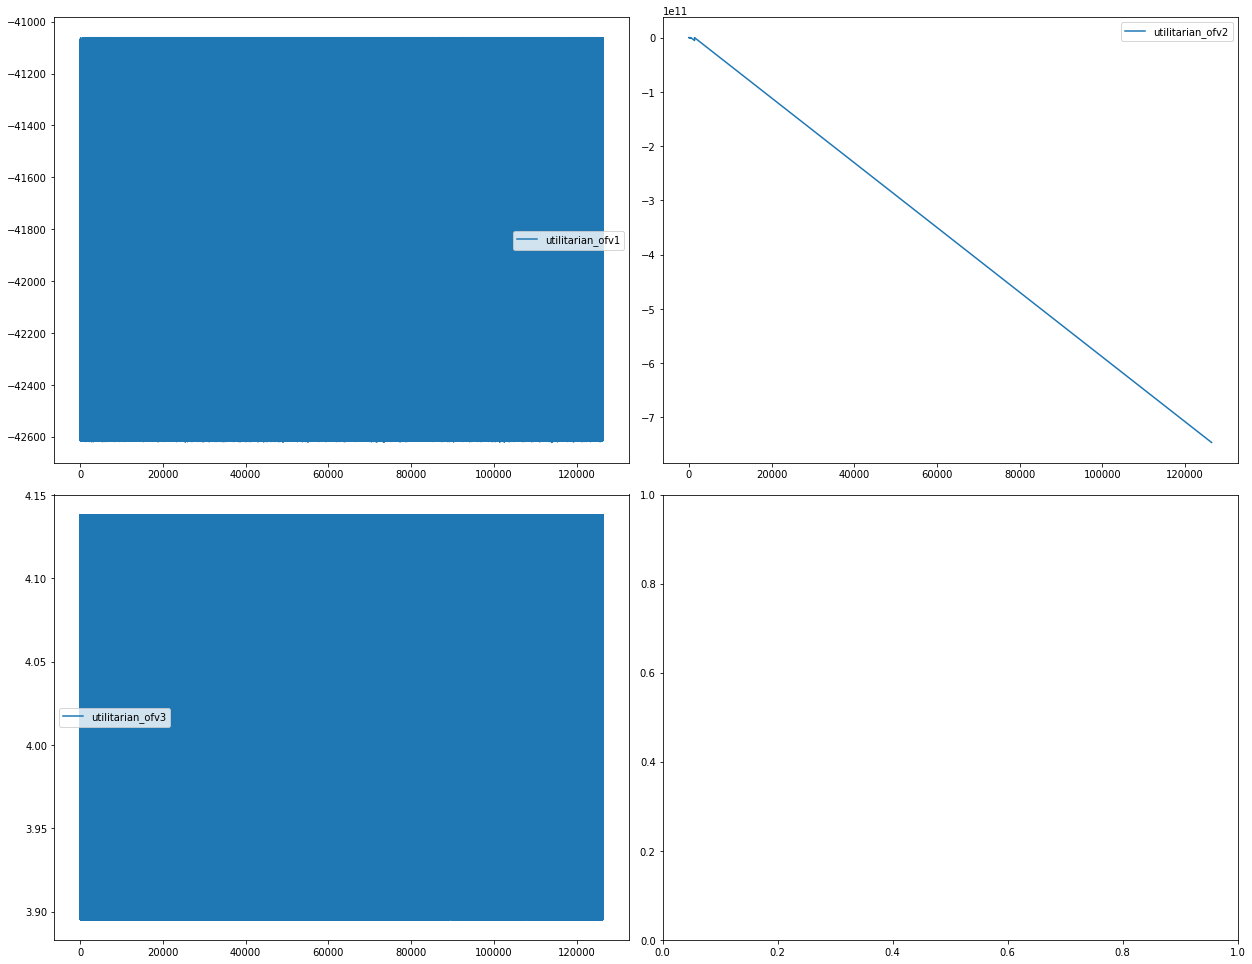

In [18]:
plt.rcParams["figure.figsize"] = [17.50, 13.50]
# plt.figure(figsize=(20,10)) 
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False)

df['utilitarian_ofv1'].plot(ax=axes[0,0], legend=True)
    
df['utilitarian_ofv2'].plot(ax=axes[0,1], legend=True)
    
df['utilitarian_ofv3'].plot(ax=axes[1,0], legend=True)
    
    
plt.show()
# plt.savefig('Basic RICE - Nordhaus Policy - 2 - indicator_vars.png', dpi=100, facecolor='w')

Note that each data point is a policy tree. A generation consists of 100 policy trees.

Conclusion: the POT algorithm does not seem to converge when coupled to RICE. Try borg instead.

### Experiment 2: RICE optimization with borg algorithm

In [19]:
database = 'Tests_Borg.db'
list_table_names_in_db(database)

Connected to SQLite
List of tables

[('Test1_couplingborg_not_edited_borg',), ('Test1_couplingborg_not_edited_borg_1',)]
the sqlite connection is closed


In [20]:
table_name = 'Test1_couplingborg_not_edited_borg_1'
df = view_sqlite_database(database, table_name)
df.drop('index', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   policy            100000 non-null  object 
 1   utilitarian_ofv1  100000 non-null  float64
 2   utilitarian_ofv2  100000 non-null  float64
 3   utilitarian_ofv3  100000 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.1+ MB


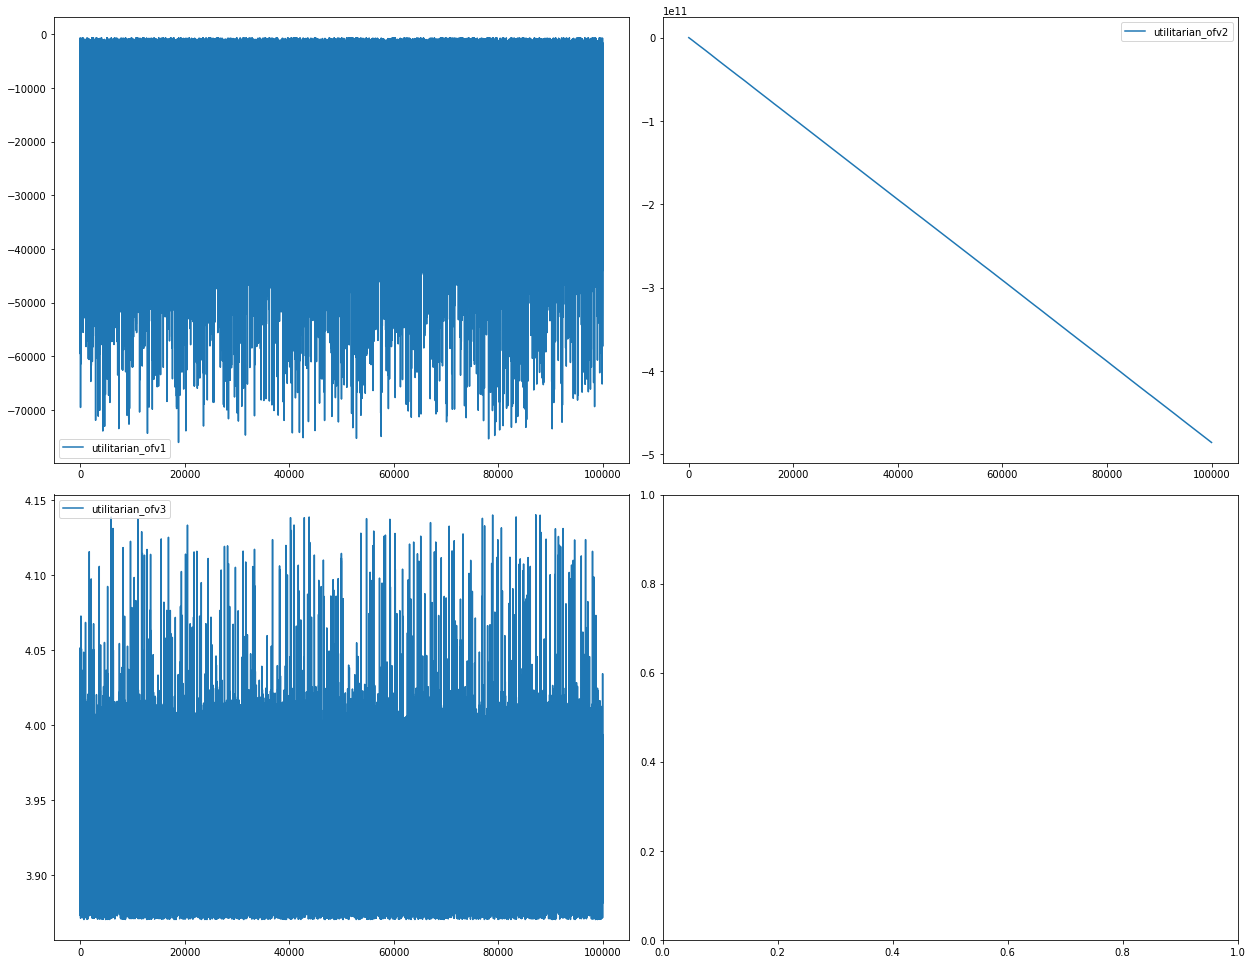

In [21]:
plt.rcParams["figure.figsize"] = [17.50, 13.50]
# plt.figure(figsize=(20,10)) 
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False)

df['utilitarian_ofv1'].plot(ax=axes[0,0], legend=True)
    
df['utilitarian_ofv2'].plot(ax=axes[0,1], legend=True)
    
df['utilitarian_ofv3'].plot(ax=axes[1,0], legend=True)
    
    
plt.show()
# plt.savefig('Basic RICE - Nordhaus Policy - 2 - indicator_vars.png', dpi=100, facecolor='w')

See if the algorithm is converging by looking at all three metrics combined instead of seperately -> move to 3d space

In [23]:
# Create generation counter. This data set was created with 100 trees per generation and every tree was recorded
generation = 0
i = 0
ar = np.zeros(100000, dtype=int)
while i < 100000:
    ar[i] = generation
    i += 1
    if i % 100 == 0:
        generation += 1
        
df["generation"] = ar

number of generations: 999
coordinates of reference point are: -76062.64915686328, -485819558942.97784, 3.8706700718715927
minimal ofv1 occurs in function evaluation number -  generation: 18831    188
Name: generation, dtype: int32
minimal ofv2 occurs in function evaluation number -  generation: 99999    999
Name: generation, dtype: int32
minimal ofv3 occurs in function evaluation number -  generation: 98599    985
Name: generation, dtype: int32
The generation closest to the reference point is [999] with a distance of 231633394.45021108
the solutions of generation [999] are: 
       utilitarian_ofv1  utilitarian_ofv2  utilitarian_ofv3
99900     -42469.454946     -4.853602e+11          3.933942
99901     -33943.437766     -4.853657e+11          3.935945
99902     -41547.598345     -4.853717e+11          3.954067
99903     -29263.853516     -4.853769e+11          3.946832
99904     -39181.968444     -4.853816e+11          3.957400
...                 ...               ...               .

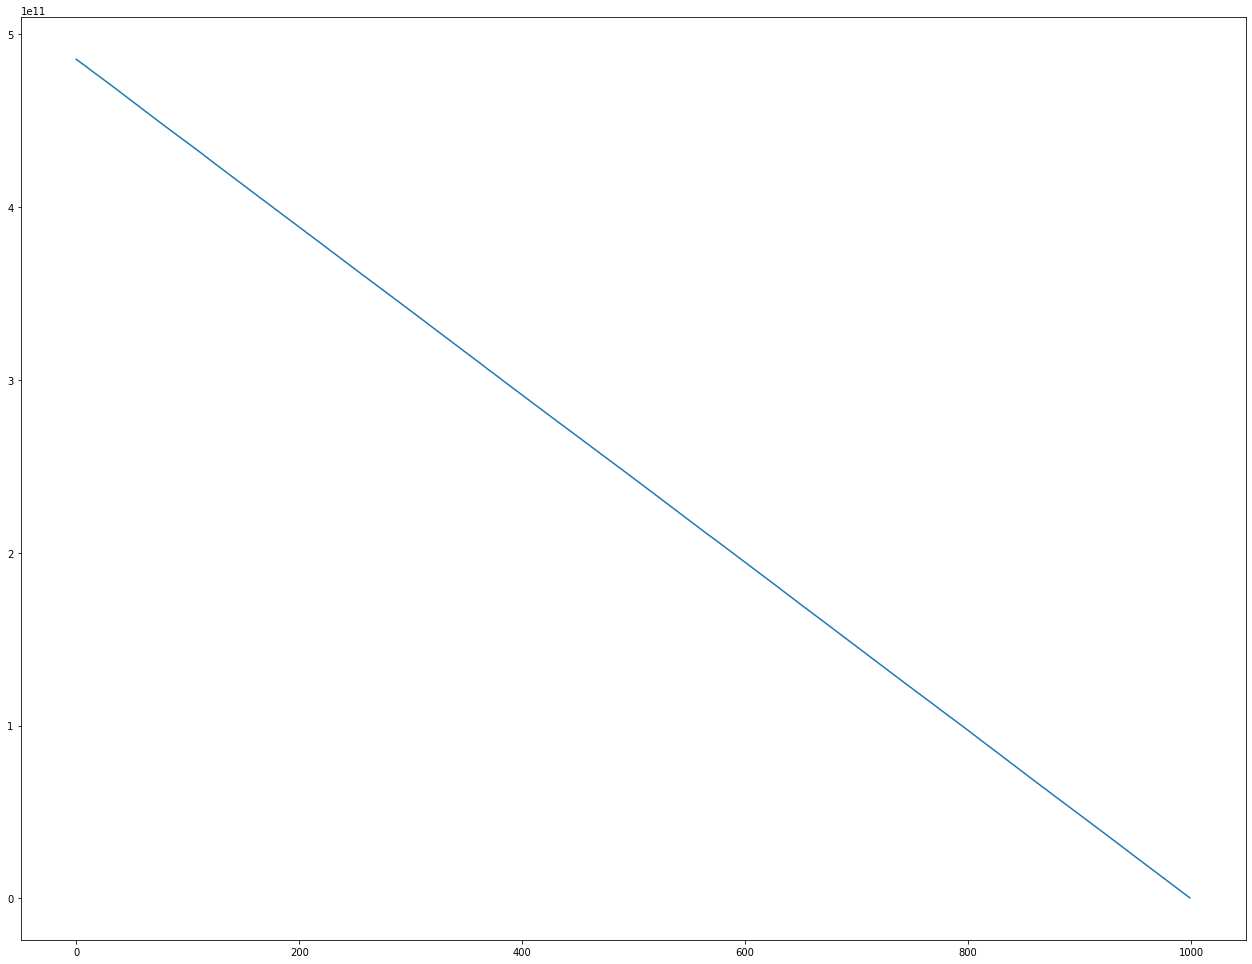

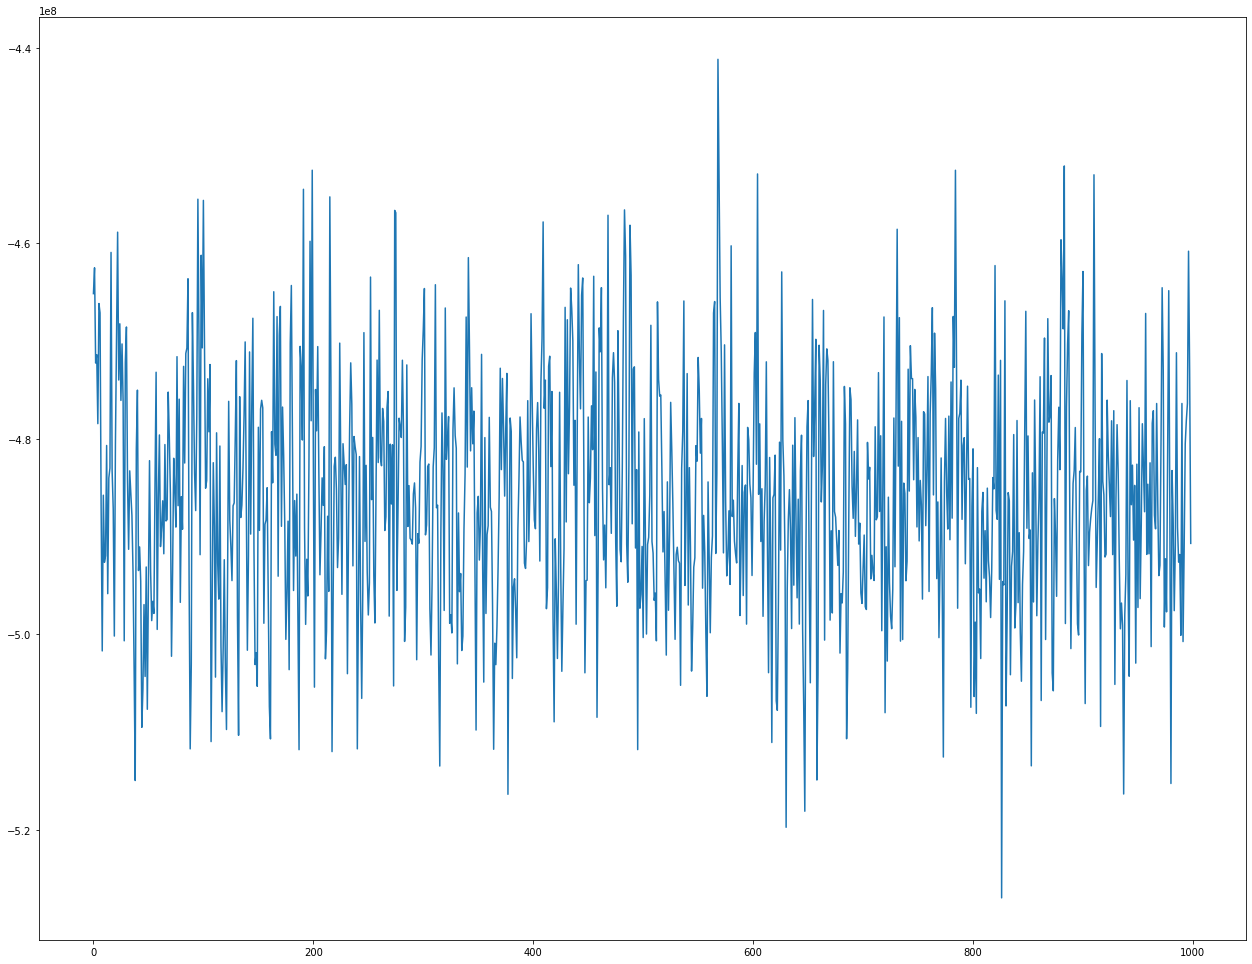

In [27]:
# This code block tracks the 'convergence' of the solutions to a (minimized) reference point

# df_VIPs = pd.read_excel('generational_test_single_cluster_VIPs_max_nfe_5000.xlsx', index_col=0)
df_VIPs = df
number_of_generations = df_VIPs["generation"].max()
print(f'number of generations: {number_of_generations}')

x1 = df_VIPs['utilitarian_ofv1'].min()
x2 = df_VIPs['utilitarian_ofv2'].min()
x3 = df_VIPs['utilitarian_ofv3'].min()
# x1 = -5
# x2 = -400000
# x3 = 2.0
print(f'coordinates of reference point are: {x1}, {x2}, {x3}')
print(f'minimal ofv1 occurs in function evaluation number -  generation: {df_VIPs.loc[df_VIPs["utilitarian_ofv1"]==x1]["generation"]}')
print(f'minimal ofv2 occurs in function evaluation number -  generation: {df_VIPs.loc[df_VIPs["utilitarian_ofv2"]==x2]["generation"]}')
print(f'minimal ofv3 occurs in function evaluation number -  generation: {df_VIPs.loc[df_VIPs["utilitarian_ofv3"]==x3]["generation"]}')
P_ref = [x1-((0.1*x1)/x1), x2-((0.1*x2)/x2), x3-((0.1*x3)/x3)]

import math
def distance_3d(P1, P2):
    return math.sqrt(((P2[0]- P1[0])**2) + ((P2[1]- P1[1])**2) + ((P2[2]- P1[2])**2))

def distance_generation(gen):
    df_0 = df_VIPs.loc[df_VIPs['generation'] == gen]

    df_t = df_0.T[1:4]

    dist_list = []
    for col in df_t.columns:
        dist = distance_3d(P_ref, list(df_t[col]))
        dist_list.append(dist)
    return dist_list

from statistics import mean
dist_dict = {}
for gen in df_VIPs['generation'].unique():
    dist = distance_generation(gen)
#     print(f'gen {gen} mean distance to ref: {mean(dist)}')
    dist_dict[gen]=mean(dist)
    
min_distance_value = min(dist_dict.values())
min_distance_gen = [k for (k, v) in dist_dict.items() if v == min_distance_value]

print(f'The generation closest to the reference point is {min_distance_gen} with a distance of {min_distance_value}')

print(f'the solutions of generation {min_distance_gen} are: ')
print(df_VIPs.loc[df_VIPs['generation']==min_distance_gen[0]][['utilitarian_ofv1', 'utilitarian_ofv2', 'utilitarian_ofv3']])

import matplotlib.pyplot as plt

ys = dist_dict.values()
xs = dist_dict.keys()

plt.plot(xs, ys)
plt.show()
# Make sure to close the plt object once done
plt.close()

# Print the differences in distance to P_ref for a generation and its predecessor
dist_dict_diff = []
for idx in range(len(dist_dict)-1):
    difference = list(dist_dict.values())[idx+1]-list(dist_dict.values())[idx]
    dist_dict_diff.append(difference)
    
ys = dist_dict_diff
xs = [x for x in range(len(ys))]

plt.plot(xs, ys)
plt.show()
# Make sure to close the plt object once done
plt.close()

The first graph plots the distance of a generation to the reference point. Note that for each generation there are 100 trees which each have a different distance to the reference point. The generational distance (shown in the plot) is the average of the 100 distances within a generation.

The second graph shows the difference in distance to the reference point between one generation and the next. For converging behaviour to a pareto front we would thus expect the differences to grow smaller as the solutions reach the pareto front (before getting larger again as the reference point is a point, not a front or line). Here instead we see more or less a constant distance convoluted with a random signal. This means that either the borg algorithm is not properly working on policy trees or that the simulaton period was too short and the algorithm simply has not had a chance to converge yet.

The borg algorithm is not properly coupled to the RICE model when operated through policy trees. This is because the borg algorithm is really more of a function handler to many more functions in the platypus library which can take various data structures as input (like strings or integers) but not tree type data structures. The concept of mutation and cross-over of solutions is therefor lost on this type of data structure in the platypus library and for this experiment it has been done by reusing some part of Hermans original POT algorithm. Nevertheless, I do not 100% understand how the platypus library is optimizing these tree structures and I suspect it is not doing it correctly. Therefor I either have to rebuild substantial parts of the platypus library or build a MOEA myself by adapting Herman's code. 

### Experiment 3: RICE optimization with homemade algorithm

Quick note: the values for objectives 1 and 2 are very large so to increase readability I have divided them by 10.000 and 1.000.000 respectively.

number of generations: 6488
coordinates of reference point are: -7.585037003060976, -181439.2985444246, 3.870686362853265
minimal ofv1 occurs in function evaluation number -  generation: 2243    564
Name: generation, dtype: int64
minimal ofv2 occurs in function evaluation number -  generation: 25665    6488
Name: generation, dtype: int64
minimal ofv3 occurs in function evaluation number -  generation: 21706    5491
Name: generation, dtype: int64
The generation closest to the reference point is [6488] with a distance of 13.874226385696256
the solutions of generation [6488] are: 
           ofv1           ofv2      ofv3
25662 -4.237765 -181407.074275  3.884592
25663 -5.773146 -181425.763361  3.884592
25664 -5.733127 -181432.365126  3.957497
25665 -5.777474 -181439.298544  3.948732


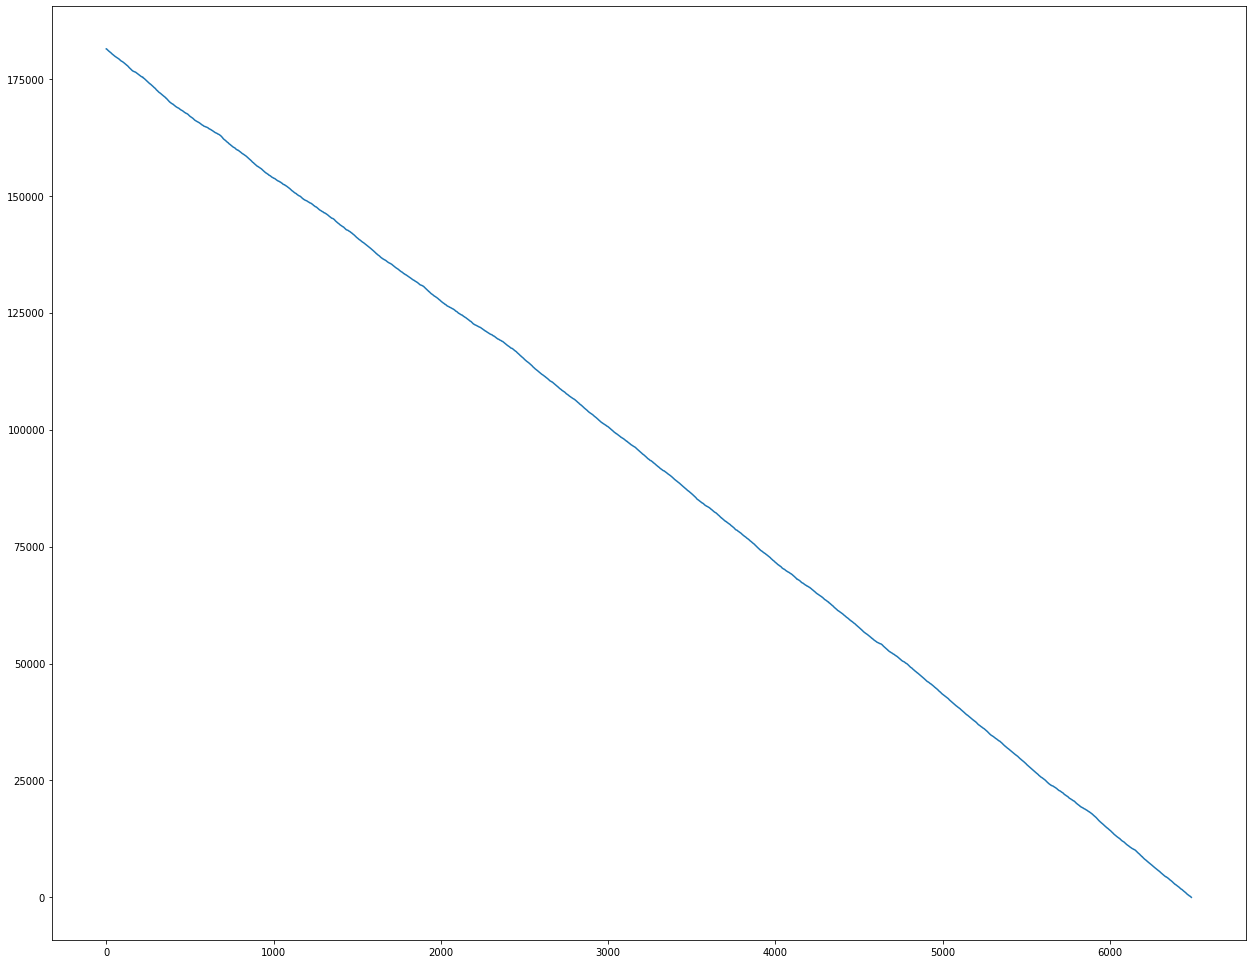

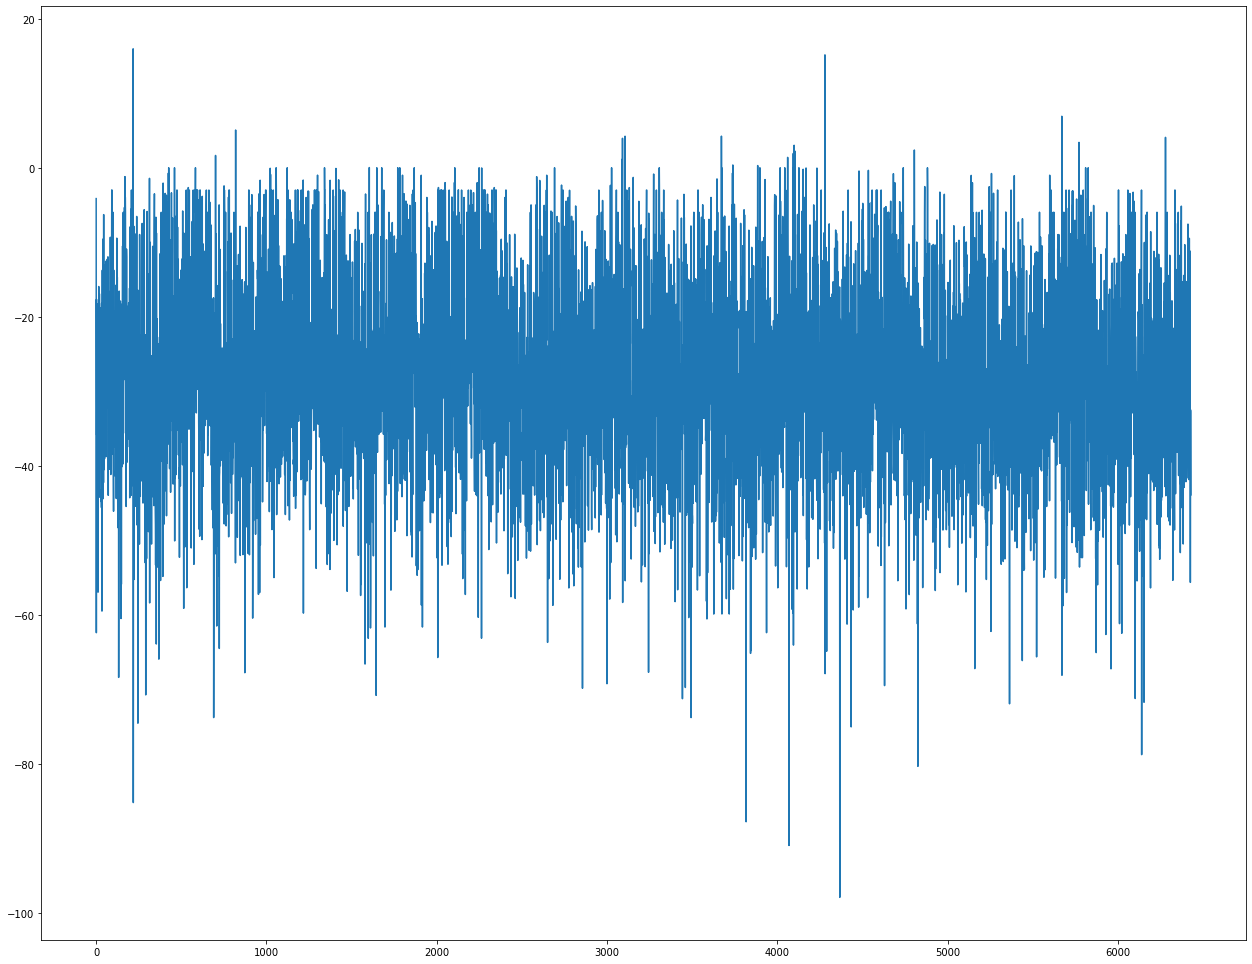

In [28]:
# This code block tracks the 'convergence' of the solutions to a (minimized) reference point

df_VIPs = pd.read_excel('generational_test_single_cluster_VIPs_max_nfe_100000.xlsx', index_col=0)
number_of_generations = df_VIPs["generation"].max()
print(f'number of generations: {number_of_generations}')

x1 = df_VIPs['ofv1'].min()
x2 = df_VIPs['ofv2'].min()
x3 = df_VIPs['ofv3'].min()
# x1 = -1000
# x2 = -1000
# x3 = -1000
print(f'coordinates of reference point are: {x1}, {x2}, {x3}')
print(f'minimal ofv1 occurs in function evaluation number -  generation: {df_VIPs.loc[df_VIPs["ofv1"]==x1]["generation"]}')
print(f'minimal ofv2 occurs in function evaluation number -  generation: {df_VIPs.loc[df_VIPs["ofv2"]==x2]["generation"]}')
print(f'minimal ofv3 occurs in function evaluation number -  generation: {df_VIPs.loc[df_VIPs["ofv3"]==x3]["generation"]}')
P_ref = [x1-((0.1*x1)/x1), x2-((0.1*x2)/x2), x3-((0.1*x3)/x3)]

import math
def distance_3d(P1, P2):
    return math.sqrt(((P2[0]- P1[0])**2) + ((P2[1]- P1[1])**2) + ((P2[2]- P1[2])**2))

def distance_generation(gen):
    df_0 = df_VIPs.loc[df_VIPs['generation'] == gen]

    df_t = df_0.T[:3]

    dist_list = []
    for col in df_t.columns:
        dist = distance_3d(P_ref, list(df_t[col]))
        dist_list.append(dist)
    return dist_list

from statistics import mean
dist_dict = {}
for gen in df_VIPs['generation'].unique():
    dist = distance_generation(gen)
#     print(f'gen {gen} mean distance to ref: {mean(dist)}')
    dist_dict[gen]=mean(dist)
    
min_distance_value = min(dist_dict.values())
min_distance_gen = [k for (k, v) in dist_dict.items() if v == min_distance_value]

print(f'The generation closest to the reference point is {min_distance_gen} with a distance of {min_distance_value}')

print(f'the solutions of generation {min_distance_gen} are: ')
print(df_VIPs.loc[df_VIPs['generation']==min_distance_gen[0]][['ofv1', 'ofv2', 'ofv3']])

import matplotlib.pyplot as plt

ys = dist_dict.values()
xs = dist_dict.keys()

plt.plot(xs, ys)
plt.show()
# Make sure to close the plt object once done
plt.close()

# Print the differences in distance to P_ref for a generation and its predecessor
dist_dict_diff = []
for idx in range(len(dist_dict)-1):
    difference = list(dist_dict.values())[idx+1]-list(dist_dict.values())[idx]
    dist_dict_diff.append(difference)
    
ys = dist_dict_diff
xs = [x for x in range(len(ys))]

plt.plot(xs, ys)
plt.show()
# Make sure to close the plt object once done
plt.close()

Conclusion: same behaviour as original POT and borg algorithms. Next up: do a space reduction (PCA) to see if the algorithm can converge.

# --------------- After meeting 31-08-2023 ---------------